In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORT NECESSARY LIBRARIES:

In [2]:
import numpy as np # linear algebra....
import pandas as pd # data processing
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

# LOADING THE DATASET

In [3]:
df=pd.read_csv('/content/drive/MyDrive/GUVI/Guvi Capstone 5/Leads.csv')
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
df = df.drop_duplicates()
df.shape

(9240, 37)

In [5]:
df = df.drop(['Prospect ID', 'Lead Number'], axis=1)
df.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                   Select   
1             Email Opened   India                   Select   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No          Select   

     City Asymmetrique Activity Index Asymmetrique Profile Index  \
0  Select                   02.Medium                  02.Medium   
1  Select                   02.Medium                 

In [6]:
df.shape

(9240, 35)

In [7]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [9]:
# Finding missing values in each column:
df.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Receive More Updates About Our Courses              0
Tags                                             3353
Lead Quality                                     4767
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
Lead Profile                                     2709
City                                             1420
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [10]:
# Percentage of null values in each column
percentage_missing = (df.isnull().sum() / len(df)) * 100
print(percentage_missing)


Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [11]:
#remove columns with more than 40% of null values

# Calculate the threshold for null values (40%)
threshold = 0.40

# Drop columns where the percentage of null values exceeds the threshold
df = df.dropna(thresh=len(df) * (1 - threshold), axis=1)

# To verify, you can check how many columns remain
print(df.shape)

(9240, 30)


# **EDA and cleaning ON NUMERICAL FEATURES:**

In [12]:
numerical = [x for x in df.columns if df[x].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 4 numerical variables

The numerical variables are :

 ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


# TotalVisits

In [13]:
df.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [14]:
#no. of null values

print(df['TotalVisits'].isnull().sum())


137


In [15]:
#impute null values with median

df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())


In [16]:
df.TotalVisits.value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1443
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

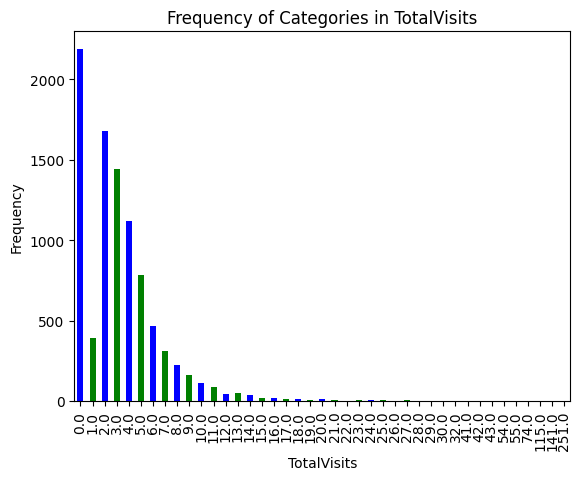

In [17]:
# Count the occurrences of each category
category_counts = df['TotalVisits'].value_counts().sort_index()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green'])

# Add titles and labels
plt.xlabel('TotalVisits')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in TotalVisits')

# Display the chart
plt.show()

In [18]:
#First, calculate the first (Q1) and third (Q3) quartiles.

Q1_1 = df['TotalVisits'].quantile(0.25)
Q3_1 = df['TotalVisits'].quantile(0.75)

# Next, calculate the IQR.
IQR = Q3_1 - Q1_1

# Finally, calculate the upper and lower bounds for outliers.
lower_bound_1 = Q1_1 - 1.5 * IQR
upper_bound_1 = Q3_1 + 1.5 * IQR

# Now, use the bounds to identify outliers.
outliers = df[(df['TotalVisits'] < lower_bound_1) | (df['TotalVisits'] > upper_bound_1)]
num_outliers = outliers.shape[0]
print(num_outliers)

267


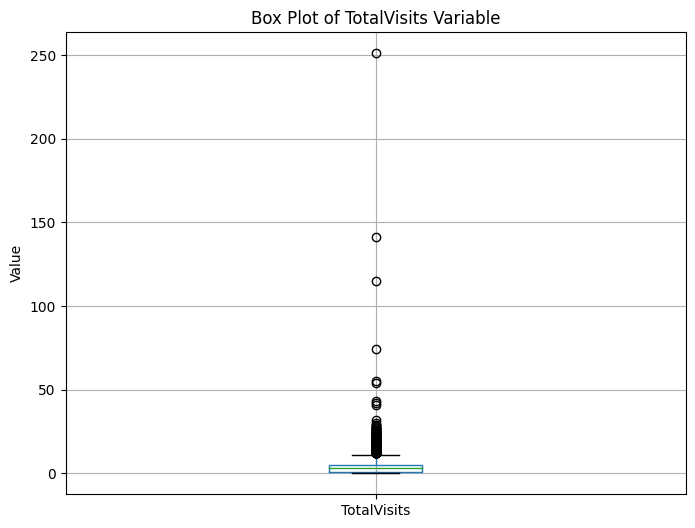

In [19]:
# Create the box plot for TotalVisits:
plt.figure(figsize=(8, 6))
df.boxplot(column='TotalVisits')

# Add titles and labels
plt.title('Box Plot of TotalVisits Variable')
plt.ylabel('Value')

# Display the plot
plt.show()

In [20]:
fig = px.histogram(df, x="TotalVisits", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

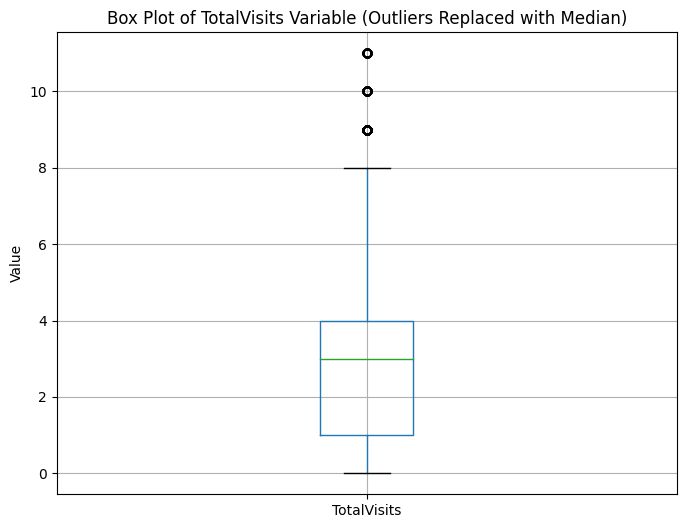

In [21]:
#impute outliers with median values

import matplotlib.pyplot as plt
import numpy as np
# Calculate the median of TotalVisits
median_totalvisits = df['TotalVisits'].median()

# Replace outliers with the median
df['TotalVisits'] = np.where(
    (df['TotalVisits'] < lower_bound_1) | (df['TotalVisits'] > upper_bound_1),
    median_totalvisits,
    df['TotalVisits']
)

# Verify that outliers have been replaced
plt.figure(figsize=(8, 6))
df.boxplot(column='TotalVisits')
plt.title('Box Plot of TotalVisits Variable (Outliers Replaced with Median)')
plt.ylabel('Value')
plt.show()


In [22]:
fig = px.histogram(df, x="TotalVisits", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Total_Time_Spent_on_Website

In [23]:
#change the column name

df = df.rename(columns={'Total Time Spent on Website': 'Total_Time_Spent_on_Website'})


In [24]:
df.Total_Time_Spent_on_Website.describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total_Time_Spent_on_Website, dtype: float64

In [25]:
#First, calculate the first (Q1) and third (Q3) quartiles.

Q1_2 = df['Total_Time_Spent_on_Website'].quantile(0.25)
Q3_2 = df['Total_Time_Spent_on_Website'].quantile(0.75)

# Next, calculate the IQR.
IQR = Q3_2 - Q1_2

# Finally, calculate the upper and lower bounds for outliers.
lower_bound_2 = Q1_2 - 1.5 * IQR
upper_bound_2 = Q3_2 + 1.5 * IQR

# Now, use the bounds to identify outliers.
outliers = df[(df['Total_Time_Spent_on_Website'] < lower_bound_2) | (df['Total_Time_Spent_on_Website'] > upper_bound_2)]
num_outliers = outliers.shape[0]
print(num_outliers)


0


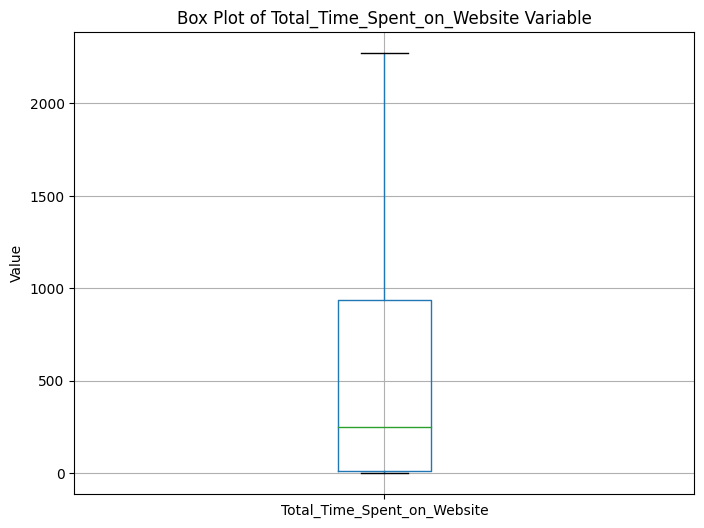

In [26]:
# Create the box plot for Total_Time_Spent_on_Website:
plt.figure(figsize=(8, 6))
df.boxplot(column='Total_Time_Spent_on_Website')

# Add titles and labels
plt.title('Box Plot of Total_Time_Spent_on_Website Variable')
plt.ylabel('Value')

# Display the plot
plt.show()


In [27]:
fig = px.histogram(df, x="Total_Time_Spent_on_Website", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Page_Views_Per_Visit

In [28]:
df = df.rename(columns={'Page Views Per Visit': 'Page_Views_Per_Visit'})

In [29]:
df.Page_Views_Per_Visit.describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page_Views_Per_Visit, dtype: float64

In [30]:
# number of null values

print(df['Page_Views_Per_Visit'].isnull().sum())


137


In [31]:
# Impute null values with the median
df['Page_Views_Per_Visit'] = df['Page_Views_Per_Visit'].fillna(df['Page_Views_Per_Visit'].median())


In [32]:
df.Page_Views_Per_Visit.value_counts()

Page_Views_Per_Visit
0.00     2189
2.00     1932
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.80        9
14.00       9
4.33        9
2.20        9
2.17        8
1.60        8
3.25        8
2.40        6
13.00       6
12.00       5
1.20        5
1.83        4
3.40        4
2.60        4
1.43        4
15.00       4
1.71        4
1.78        3
4.25        3
16.00       3
4.75        3
5.67        3
1.57        3
1.38        3
3.60        2
1.23        2
1.56        2
5.40        2
2.22        2
7.50        2
1.14        2
5.25        2
2.09        2
3.20        2
3.75        2
5.33        2
2.83        2
2.71        2
1.22        2
2.13        1
1.54        1
6.67        1
24.00       1
2.14        1
2.45        1
3.29        1
1.48        1
3.82        1
4.17        1
1.63        1
3.38        1
1.17        1
14.50       1
3.80        1
1.19        1
3.17        1
1.93        1
11.50       1
8.33        1
55.00       1
4.40        1
8.21        1
8.50        1
2.63        1
1.27        1
2.57        1
2.86        1
3.91        1
6.71        1
3.57        1
1.31        1
2.90        1
3.83        1
1.45        1
2.38        1
1.86        1
2.29        1
1.21        1
12.33       1
3.43        1
2.56        1
6.33        1
1.64        1
2.08        1
Name: count, dtype: int64

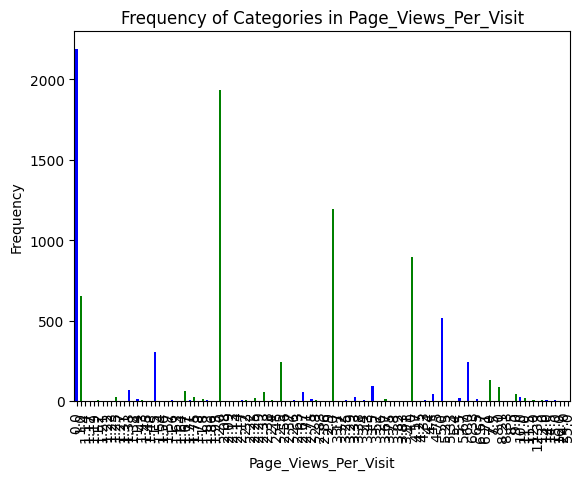

In [33]:
# Count the occurrences of each category
category_counts = df['Page_Views_Per_Visit'].value_counts().sort_index()
# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green'])
# Add titles and labels
plt.xlabel('Page_Views_Per_Visit')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in Page_Views_Per_Visit')
# Display the chart
plt.show()

In [34]:
#First, calculate the first (Q1) and third (Q3) quartiles.
Q1_3 = df['Page_Views_Per_Visit'].quantile(0.25)
Q3_3 = df['Page_Views_Per_Visit'].quantile(0.75)
# Next, calculate the IQR.
IQR = Q3_3 - Q1_3
# Finally, calculate the upper and lower bounds for outliers.
lower_bound_3 = Q1_3 - 1.5 * IQR
upper_bound_3 = Q3_3 + 1.5 * IQR
# Now, use the bounds to identify outliers.
outliers = df[(df['Page_Views_Per_Visit'] < lower_bound_3) | (df['Page_Views_Per_Visit'] > upper_bound_3)]
num_outliers = outliers.shape[0]
print(num_outliers)


360


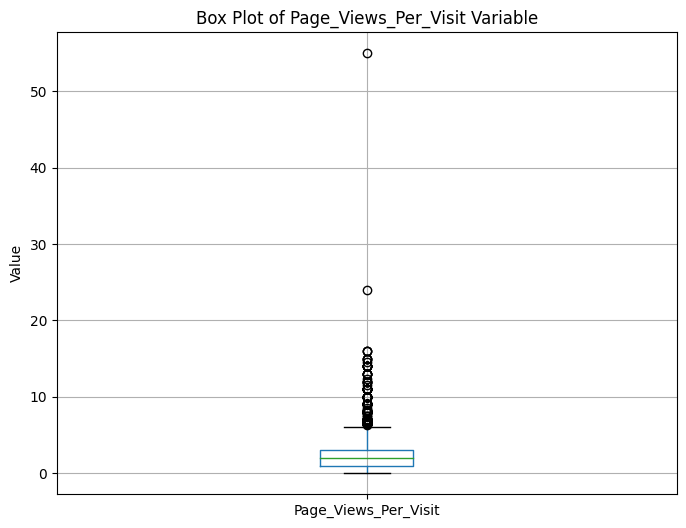

In [35]:
# Create the box plot for Page_Views_Per_Visit:
plt.figure(figsize=(8, 6))
df.boxplot(column='Page_Views_Per_Visit')

# Add titles and labels
plt.title('Box Plot of Page_Views_Per_Visit Variable')
plt.ylabel('Value')

# Display the plot
plt.show()


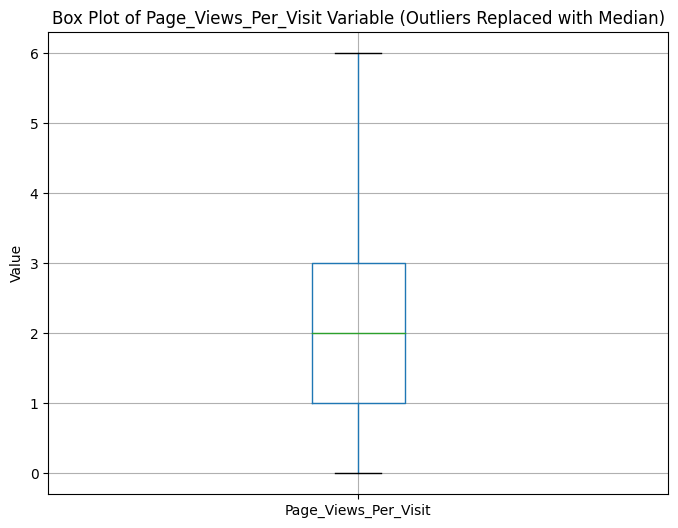

In [36]:
# impute outliers with median value

# Calculate the median of Page_Views_Per_Visit
median_pageviews = df['Page_Views_Per_Visit'].median()

# Replace outliers with the median
df['Page_Views_Per_Visit'] = np.where(
    (df['Page_Views_Per_Visit'] < lower_bound_3) | (df['Page_Views_Per_Visit'] > upper_bound_3),
    median_pageviews,
    df['Page_Views_Per_Visit']
)

# Verify that outliers have been replaced
plt.figure(figsize=(8, 6))
df.boxplot(column='Page_Views_Per_Visit')
plt.title('Box Plot of Page_Views_Per_Visit Variable (Outliers Replaced with Median)')
plt.ylabel('Value')
plt.show()


In [37]:
fig = px.histogram(df, x="Page_Views_Per_Visit", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

#Converted- Target Variable

In [38]:
df.Converted.describe()

count    9240.000000
mean        0.385390
std         0.486714
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Converted, dtype: float64

In [39]:
df.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

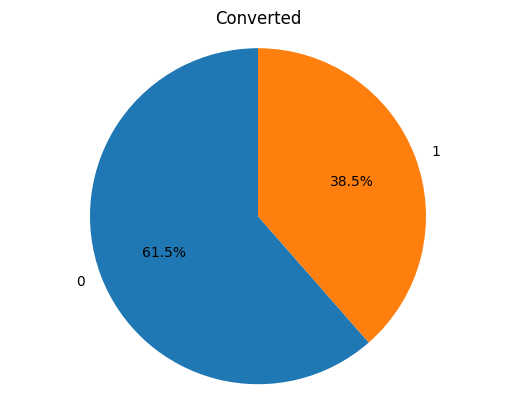

In [40]:
# Count the occurrences of each category
category_counts = df['Converted'].value_counts()

# Create the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Converted')

# Ensure the circle's proportion
plt.axis('equal')

# Display the chart
plt.show()

# Correlation Matrix

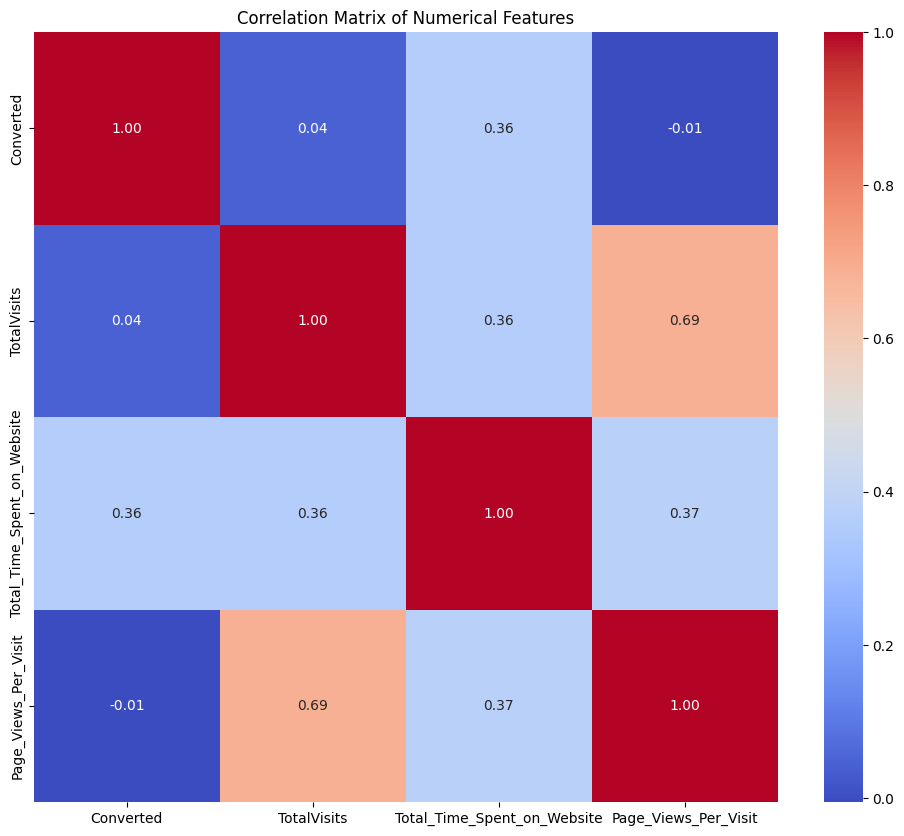

In [41]:
# Correlation Matrix

import matplotlib.pyplot as plt
# Correlation matrix for numerical features
numerical = ['Converted', 'TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']
correlation_matrix = df[numerical].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# EDA on Catergorical Data

In [42]:
categorical = [x for x in df.columns if df[x].dtype=='O'] ## list comprehension  ## checking for the datatype of the column

print('There are {} categorical variables\n'.format(len(categorical)))  ## how many categorical var are there

print('The categorical variables are :\n\n', categorical)

There are 26 categorical variables

The categorical variables are :

 ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [43]:
df[categorical].head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                   Select   
1             Email Opened   India                   Select   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags Update me on Supply Chain Content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [44]:
# Statistics on Categorical data:
round(df.describe(exclude = ['float', 'int64']),2)

Lead Origin Lead Source Do Not Email Do Not Call  \
count                      9240        9204         9240        9240   
unique                        5          21            2           2   
top     Landing Page Submission      Google           No          No   
freq                       4886        2868         8506        9238   

       Last Activity Country Specialization  \
count           9137    6779           7802   
unique            17      38             19   
top     Email Opened   India         Select   
freq            3437    6492           1942   

       How did you hear about X Education What is your current occupation  \
count                                7033                            6550   
unique                                 10                               6   
top                                Select                      Unemployed   
freq                                 5043                            5600   

       What matters most to you in choosing a course Search Magazine  \
count                                           6531   9240     9240   
unique                                             3      2        1   
top                          Better Career Prospects     No       No   
freq                                            6528   9226     9240   

       Newspaper Article X Education Forums Newspaper Digital Advertisement  \
count               9240               9240      9240                  9240   
unique                 2                  2         2                     2   
top                   No                 No        No                    No   
freq                9238               9239      9239                  9236   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   

                                       Tags Update me on Supply Chain Content  \
count                                  5887                              9240   
unique                                   26                                 1   
top     Will revert after reading the email                                No   
freq                                   2072                              9240   

       Get updates on DM Content Lead Profile    City  \
count                       9240         6531    7820   
unique                         1            6       7   
top                           No       Select  Mumbai   
freq                        9240         4146    3222   

       I agree to pay the amount through cheque  \
count                                      9240   
unique                                        1   
top                                          No   
freq                                       9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407

# Lead Origin

In [45]:
# rename column

df = df.rename(columns={'Lead Origin': 'Lead_Origin'})


In [46]:
df.Lead_Origin.value_counts()

Lead_Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

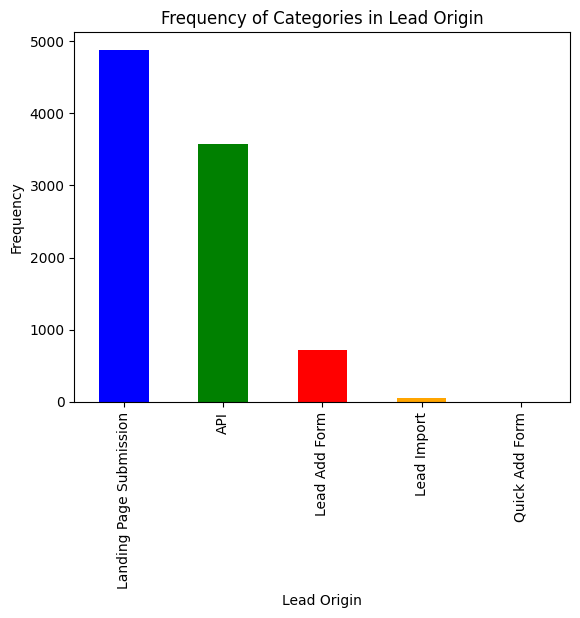

In [47]:
#bar chart for categories

# Count the occurrences of each category
category_counts = df['Lead_Origin'].value_counts()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])

# Add titles and labels
plt.xlabel('Lead Origin')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in Lead Origin')

# Display the chart
plt.show()


In [48]:
fig = px.histogram(df, x="Lead_Origin", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Lead Source

In [49]:
# rename column
df = df.rename(columns={'Lead Source': 'Lead_Source'})


In [50]:
#number of null values

print(df['Lead_Source'].isnull().sum())


36


In [51]:
#impute null values as 'unknown'

df['Lead_Source'] = df['Lead_Source'].fillna('Unknown')


In [52]:
df.Lead_Source.value_counts()

Lead_Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Unknown                36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [53]:
#group categories with lesser than frequency of occurence 10 as 'other'

# Group categories with frequency less than 10 as 'Other'
def group_low_frequency_categories(df, column_name, threshold=10):
  value_counts = df[column_name].value_counts()
  low_frequency_categories = value_counts[value_counts < threshold].index.tolist()
  df[column_name] = df[column_name].apply(lambda x: 'Other' if x in low_frequency_categories else x)
  return df

df = group_low_frequency_categories(df, 'Lead_Source')


In [54]:
df.Lead_Source.value_counts()

Lead_Source
Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Unknown               36
Other                 28
Name: count, dtype: int64

In [55]:
fig = px.histogram(df, x="Lead_Source", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Do Not Email

In [56]:
# Rename the column
df = df.rename(columns={'Do Not Email': 'Do_Not_Email'})


In [57]:
df.Do_Not_Email.isna().sum()

0

In [58]:
df.Do_Not_Email.value_counts()

Do_Not_Email
No     8506
Yes     734
Name: count, dtype: int64

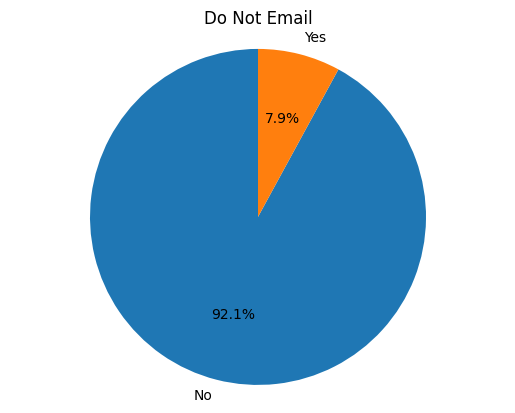

In [59]:
# PIE CHART
# Count the occurrences of each category
category_counts = df['Do_Not_Email'].value_counts()

# Create the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Do Not Email')

# Ensure the circle's proportion
plt.axis('equal')

# Display the chart
plt.show()


In [60]:
fig = px.histogram(df, x="Do_Not_Email", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Do Not Call

In [61]:
# Rename the column
df = df.rename(columns={'Do Not Call': 'Do_Not_Call'})


In [62]:
df.Do_Not_Call.isna().sum()

0

In [63]:
df.Do_Not_Call.value_counts()

Do_Not_Call
No     9238
Yes       2
Name: count, dtype: int64

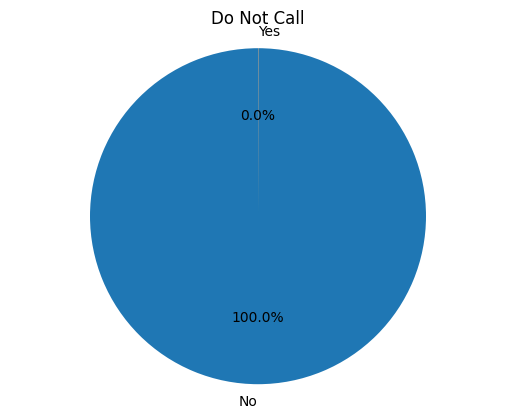

In [64]:
# Count the occurrences of each category
category_counts = df['Do_Not_Call'].value_counts()

# Create the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Do Not Call')

# Ensure the circle's proportion
plt.axis('equal')

# Display the chart
plt.show()


In [65]:
fig = px.histogram(df, x="Do_Not_Call", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Last Activity

In [66]:
# Rename the column
df = df.rename(columns={'Last Activity': 'Last_Activity'})


In [67]:
df.Last_Activity.isna().sum()

103

In [68]:
#impute null as 'Unknown'

df['Last_Activity'] = df['Last_Activity'].fillna('Unknown')


In [69]:
df.Last_Activity.value_counts()

Last_Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unknown                          103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [70]:
# Group categories with frequency less than 10 as 'Other'
def group_low_frequency_categories(df, column_name, threshold=10):
  value_counts = df[column_name].value_counts()
  low_frequency_categories = value_counts[value_counts < threshold].index.tolist()
  df[column_name] = df[column_name].apply(lambda x: 'Other' if x in low_frequency_categories else x)
  return df

df = group_low_frequency_categories(df, 'Last_Activity')

df.Last_Activity.value_counts()


Last_Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unknown                       103
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Other                          21
Name: count, dtype: int64

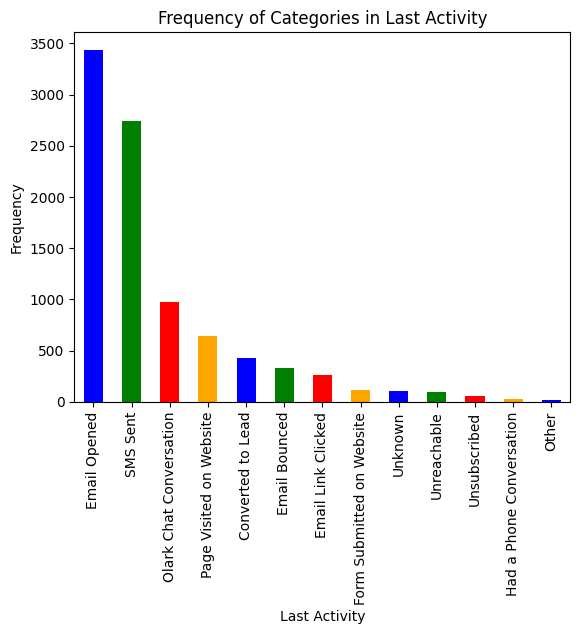

In [71]:
#bar chart

import matplotlib.pyplot as plt
# Count the occurrences of each category
category_counts = df['Last_Activity'].value_counts()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])

# Add titles and labels
plt.xlabel('Last Activity')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in Last Activity')

# Display the chart
plt.show()


In [72]:
fig = px.histogram(df, x="Last_Activity", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Country

In [73]:
df.Country.isna().sum()

2461

In [74]:
#impute null values as 'Unknown'

df['Country'] = df['Country'].fillna('Unknown')


In [75]:
df.Country.value_counts()

Country
India                   6492
Unknown                 2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland                1
Denmark                    1
Russia                     1
Vietnam                    1
Indonesia                  1
Name: count, dtype: int64

In [76]:
#group categories with occurances lesser than 10

def group_low_frequency_categories(df, column_name, threshold=10):
  value_counts = df[column_name].value_counts()
  low_frequency_categories = value_counts[value_counts < threshold].index.tolist()
  df[column_name] = df[column_name].apply(lambda x: 'Other' if x in low_frequency_categories else x)
  return df

df = group_low_frequency_categories(df, 'Country')

df.Country.value_counts()


Country
India                   6492
Unknown                 2461
Other                     82
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Name: count, dtype: int64

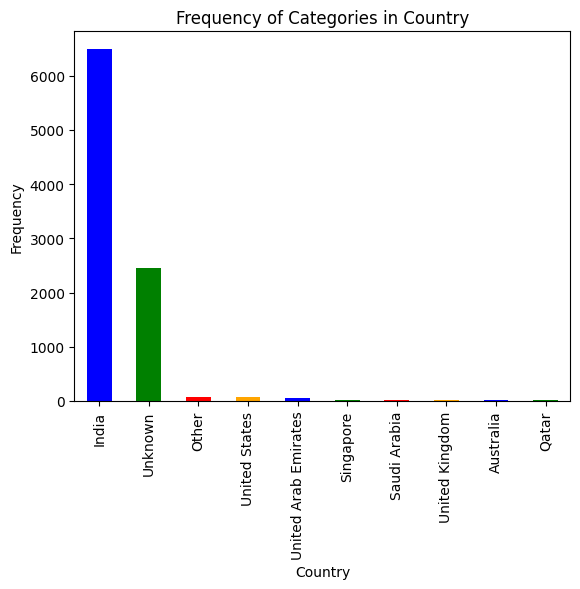

In [77]:
#Bar chart

import matplotlib.pyplot as plt
# Count the occurrences of each category
category_counts = df['Country'].value_counts()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])

# Add titles and labels
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in Country')

# Display the chart
plt.show()


In [78]:
fig = px.histogram(df, x="Country", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Specialization

In [79]:
df.Specialization.isna().sum()

1438

In [80]:
#impute null values as 'Unknown'

df['Specialization'] = df['Specialization'].fillna('Unknown')


In [81]:
df.Specialization.value_counts()

Specialization
Select                               1942
Unknown                              1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [82]:
# Since Select is a value representing that the user has not selected any option, I'm replacing it as'Unknown':
#replace 'Select' as 'Unknown'

df['Specialization'] = df['Specialization'].replace('Select', 'Unknown')


In [83]:
df.Specialization.value_counts()

Specialization
Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

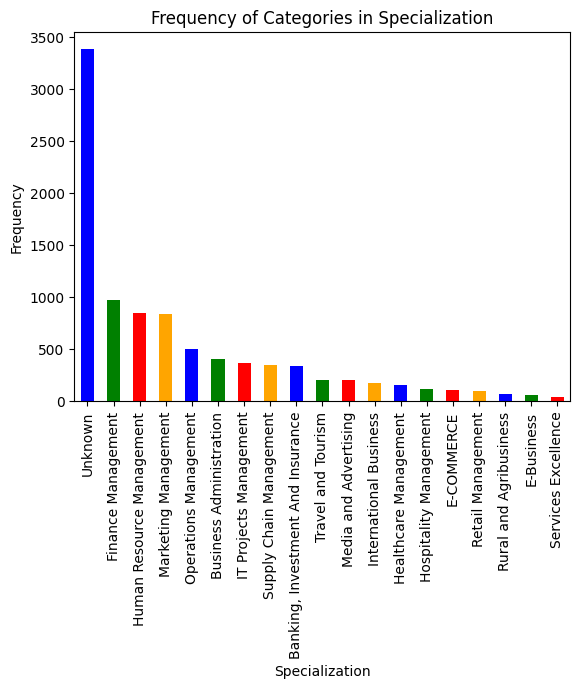

In [84]:
#Bar chart

import matplotlib.pyplot as plt
# Count the occurrences of each category
category_counts = df['Specialization'].value_counts()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])

# Add titles and labels
plt.xlabel('Specialization')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in Specialization')

# Display the chart
plt.show()


In [85]:
fig = px.histogram(df, x="Specialization", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# How did you hear about X Education

In [86]:
# Rename the column
df = df.rename(columns={'How did you hear about X Education': 'How_did_you_hear_about_X_Education'})


In [87]:
df.How_did_you_hear_about_X_Education.isna().sum()

2207

In [88]:
#impute null values as 'Unknown'

df['How_did_you_hear_about_X_Education'] = df['How_did_you_hear_about_X_Education'].fillna('Unknown')


In [89]:
df.How_did_you_hear_about_X_Education.value_counts()

How_did_you_hear_about_X_Education
Select                   5043
Unknown                  2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [90]:
# Since Select is a value representing that the user has not selected any option, I'm replacing it as'Unknwon':
#replace 'Select' as 'Unknown'

df['How_did_you_hear_about_X_Education'] = df['How_did_you_hear_about_X_Education'].replace('Select', 'Unknown')


In [91]:
df.How_did_you_hear_about_X_Education.value_counts()

How_did_you_hear_about_X_Education
Unknown                  7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

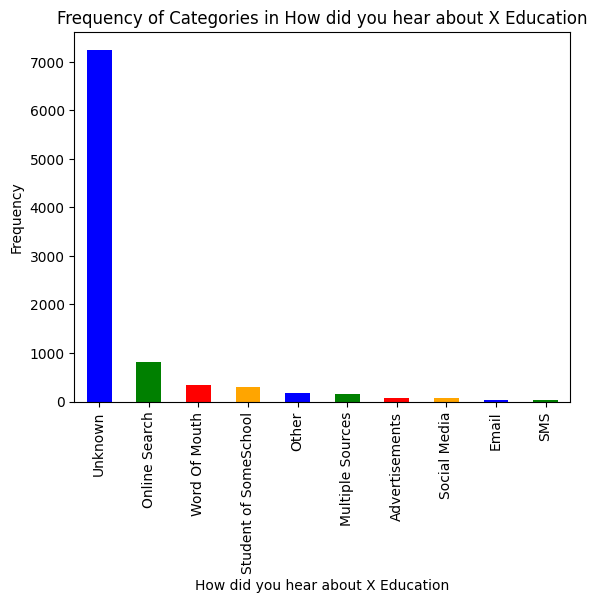

In [92]:
# Bar chart

import matplotlib.pyplot as plt
# Count the occurrences of each category
category_counts = df['How_did_you_hear_about_X_Education'].value_counts()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])

# Add titles and labels
plt.xlabel('How did you hear about X Education')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in How did you hear about X Education')

# Display the chart
plt.show()


In [93]:
fig = px.histogram(df, x="How_did_you_hear_about_X_Education", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# What is your current occupation

In [94]:
# Rename the column
df = df.rename(columns={'What is your current occupation': 'What_is_your_current_occupation'})


In [95]:
df.What_is_your_current_occupation.isna().sum()

2690

In [96]:
# Impute null values with 'Unknown'
df['What_is_your_current_occupation'] = df['What_is_your_current_occupation'].fillna('Unknown')


In [97]:
df.What_is_your_current_occupation.value_counts()

What_is_your_current_occupation
Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

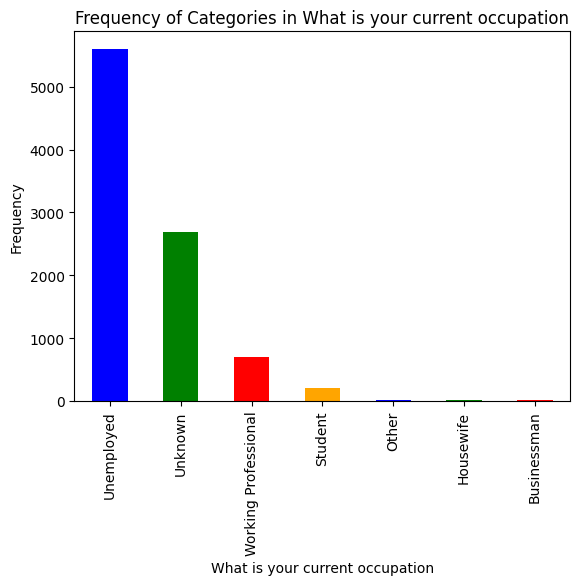

In [98]:
# Bar chart

# Count the occurrences of each category
category_counts = df['What_is_your_current_occupation'].value_counts()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])

# Add titles and labels
plt.xlabel('What is your current occupation')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in What is your current occupation')

# Display the chart
plt.show()


In [99]:
fig = px.histogram(df, x="What_is_your_current_occupation", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# What matters most to you in choosing a course

In [100]:
# Rename the column
df = df.rename(columns={'What matters most to you in choosing a course': 'What_matters_most_to_you_in_choosing_a_course'})


In [101]:
df.What_matters_most_to_you_in_choosing_a_course.isna().sum()

2709

In [102]:
# Impute null values with 'Unknown'
df['What_matters_most_to_you_in_choosing_a_course'] = df['What_matters_most_to_you_in_choosing_a_course'].fillna('Unknown')


In [103]:
df.What_matters_most_to_you_in_choosing_a_course.value_counts()

What_matters_most_to_you_in_choosing_a_course
Better Career Prospects      6528
Unknown                      2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

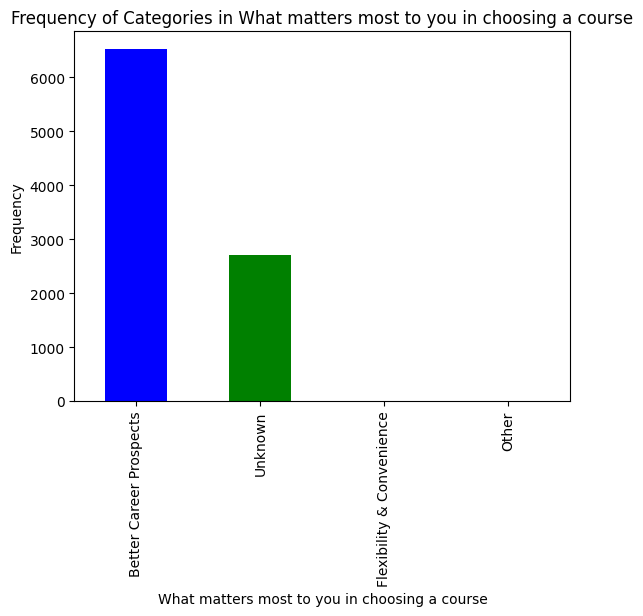

In [104]:
# Bar chart

# Count the occurrences of each category
category_counts = df['What_matters_most_to_you_in_choosing_a_course'].value_counts()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])

# Add titles and labels
plt.xlabel('What matters most to you in choosing a course')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in What matters most to you in choosing a course')

# Display the chart
plt.show()


In [105]:
fig = px.histogram(df, x="What_matters_most_to_you_in_choosing_a_course", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Search

In [106]:
df.Search.isna().sum()

0

In [107]:
df.Search.value_counts()

Search
No     9226
Yes      14
Name: count, dtype: int64

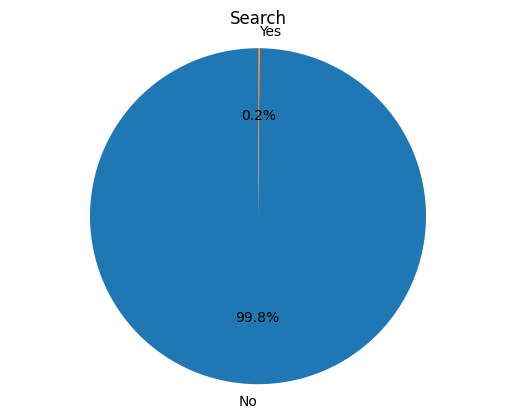

In [108]:
#Pie chart
# Count the occurrences of each category
category_counts = df['Search'].value_counts()

# Create the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Search')

# Ensure the circle's proportion
plt.axis('equal')

# Display the chart
plt.show()


In [109]:
fig = px.histogram(df, x="Search", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Magazine

In [110]:
df.Magazine.isna().sum()

0

In [111]:
df.Magazine.value_counts()

Magazine
No    9240
Name: count, dtype: int64

In [112]:
fig = px.histogram(df, x="Magazine", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Newspaper Article

In [113]:
#rename column

df = df.rename(columns={'Newspaper Article': 'Newspaper_Article'})


In [114]:
df.Newspaper_Article.isna().sum()

0

In [115]:
df.Newspaper_Article.value_counts()

Newspaper_Article
No     9238
Yes       2
Name: count, dtype: int64

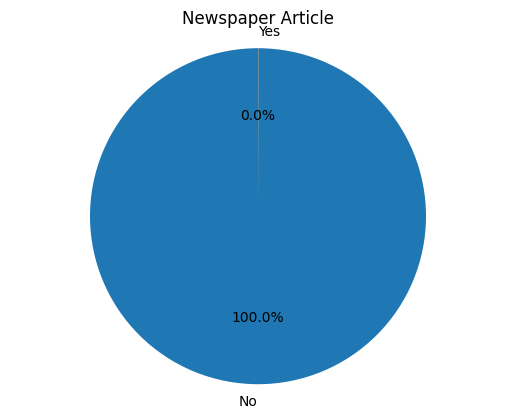

In [116]:
#Pie chart

import matplotlib.pyplot as plt
# Count the occurrences of each category
category_counts = df['Newspaper_Article'].value_counts()

# Create the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Newspaper Article')

# Ensure the circle's proportion
plt.axis('equal')

# Display the chart
plt.show()


In [117]:
fig = px.histogram(df, x="Newspaper_Article", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# X Education Forums

In [118]:
# Rename the column
df = df.rename(columns={'X Education Forums': 'X_Education_Forums'})


In [119]:
df.X_Education_Forums.isna().sum()

0

In [120]:
df.X_Education_Forums.value_counts()

X_Education_Forums
No     9239
Yes       1
Name: count, dtype: int64

In [121]:
fig = px.histogram(df, x="X_Education_Forums", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Newspaper

In [122]:
df.Newspaper.isna().sum()

0

In [123]:
df.Newspaper.value_counts()

Newspaper
No     9239
Yes       1
Name: count, dtype: int64

In [124]:
fig = px.histogram(df, x="Newspaper", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Digital Advertisement

In [125]:
# Rename the column
df = df.rename(columns={'Digital Advertisement': 'Digital_Advertisement'})


In [126]:
df.Digital_Advertisement.isna().sum()

0

In [127]:
df.Digital_Advertisement.value_counts()

Digital_Advertisement
No     9236
Yes       4
Name: count, dtype: int64

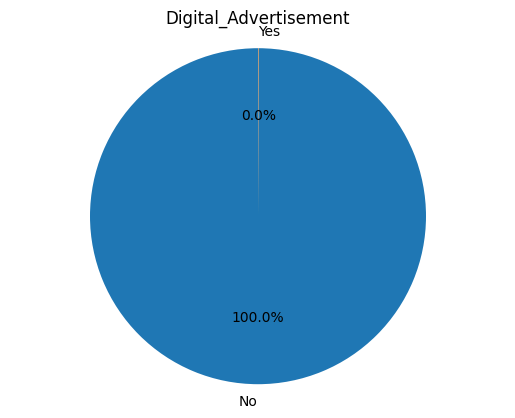

In [128]:
#Pie chart

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and you want a pie chart for 'Lead_Origin'

# Count the occurrences of each category
category_counts = df['Digital_Advertisement'].value_counts()

# Create the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Digital_Advertisement')

# Ensure the circle's proportion
plt.axis('equal')

# Display the chart
plt.show()


In [129]:
fig = px.histogram(df, x="Digital_Advertisement", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Through Recommendations

In [130]:
# Rename the column
df = df.rename(columns={'Through Recommendations': 'Through_Recommendations'})

In [131]:
df.Through_Recommendations.isna().sum()

0

In [132]:
df.Through_Recommendations.value_counts()

Through_Recommendations
No     9233
Yes       7
Name: count, dtype: int64

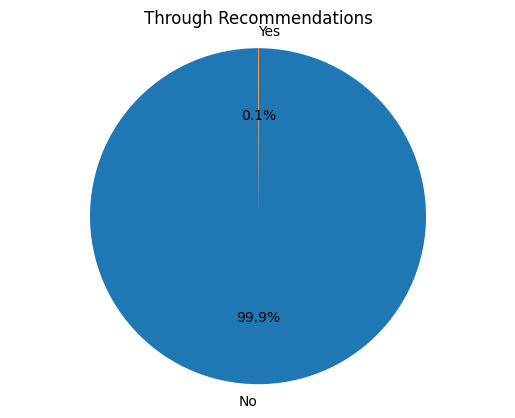

In [133]:
# Pie chart

# Count the occurrences of each category
category_counts = df['Through_Recommendations'].value_counts()

# Create the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Through Recommendations')

# Ensure the circle's proportion
plt.axis('equal')

# Display the chart
plt.show()

In [134]:
fig = px.histogram(df, x="Through_Recommendations", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Receive More Updates About Our Courses

In [135]:
df=df.rename(columns={'Receive More Updates About Our Courses': 'Receive_More_Updates_About_Our_Courses'})

In [136]:
df.Receive_More_Updates_About_Our_Courses.isna().sum()

0

In [137]:
df.Receive_More_Updates_About_Our_Courses.value_counts()

Receive_More_Updates_About_Our_Courses
No    9240
Name: count, dtype: int64

In [138]:
fig = px.histogram(df, x="Receive_More_Updates_About_Our_Courses", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Tags

In [139]:
df.Tags.isna().sum()

3353

In [140]:
#impute null values as 'Unknown'

df['Tags'] = df['Tags'].fillna('Unknown')


In [141]:
df.Tags.value_counts()

Tags
Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others                                          7
Still Thinking                                          6
Want to take admission but has financial problems       6
In confusion whether part time or DLP                   5
Interested in Next batch                                5
Lateral student                                         3
Shall take in the next coming month                     2
University not recognized                               2
Recognition issue (DEC approval)                        1
Name: count, dtype: int64

In [142]:
#group occurances lesser than 20 as 'Other'

def group_low_frequency_categories(df, column_name, threshold=20):
  value_counts = df[column_name].value_counts()
  low_frequency_categories = value_counts[value_counts < threshold].index.tolist()
  df[column_name] = df[column_name].apply(lambda x: 'Other' if x in low_frequency_categories else x)
  return df

df = group_low_frequency_categories(df, 'Tags')

df.Tags.value_counts()


Tags
Unknown                                3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
invalid number                           83
Diploma holder (Not Eligible)            63
Other                                    49
wrong number given                       47
opp hangup                               33
number not provided                      27
Name: count, dtype: int64

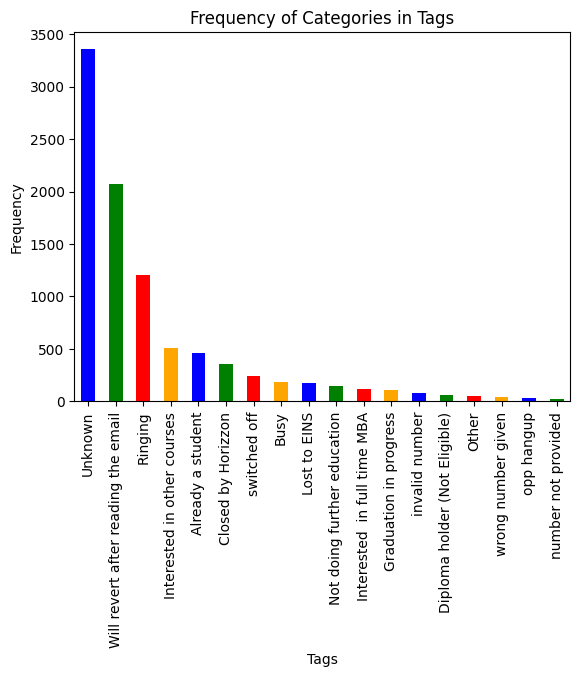

In [143]:
#Bar chart

import matplotlib.pyplot as plt
# Bar chart for Tags

# Count the occurrences of each category
category_counts = df['Tags'].value_counts()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])

# Add titles and labels
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in Tags')

# Display the chart
plt.show()


In [144]:
fig = px.histogram(df, x="Tags", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Update me on Supply Chain Content

In [145]:
df= df.rename(columns={'Update me on Supply Chain Content': 'Update_me_on_Supply_Chain_Content'})

In [146]:
df.Update_me_on_Supply_Chain_Content.isna().sum()

0

In [147]:
df.Update_me_on_Supply_Chain_Content.value_counts()

Update_me_on_Supply_Chain_Content
No    9240
Name: count, dtype: int64

In [148]:
fig = px.histogram(df, x="Update_me_on_Supply_Chain_Content", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Get updates on DM Content

In [149]:
df= df.rename(columns={'Get updates on DM Content': 'Get_updates_on_DM_Content'})

In [150]:
df.Get_updates_on_DM_Content.isna().sum()

0

In [151]:
df.Get_updates_on_DM_Content.value_counts()

Get_updates_on_DM_Content
No    9240
Name: count, dtype: int64

In [152]:
fig = px.histogram(df, x="Get_updates_on_DM_Content", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Lead Profile

In [153]:
df= df.rename(columns={'Lead Profile': 'Lead_Profile'})

In [154]:
df.Lead_Profile.isna().sum()

2709

In [155]:
#IMPUTE NULL VALUES AS 'UNKNOWN'

df['Lead_Profile'] = df['Lead_Profile'].fillna('Unknown')


In [156]:
df.Lead_Profile.value_counts()

Lead_Profile
Select                         4146
Unknown                        2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [157]:
#replace 'Select' as 'Unknown'

df['Lead_Profile'] = df['Lead_Profile'].replace('Select', 'Unknown')

df.Lead_Profile.value_counts()


Lead_Profile
Unknown                        6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

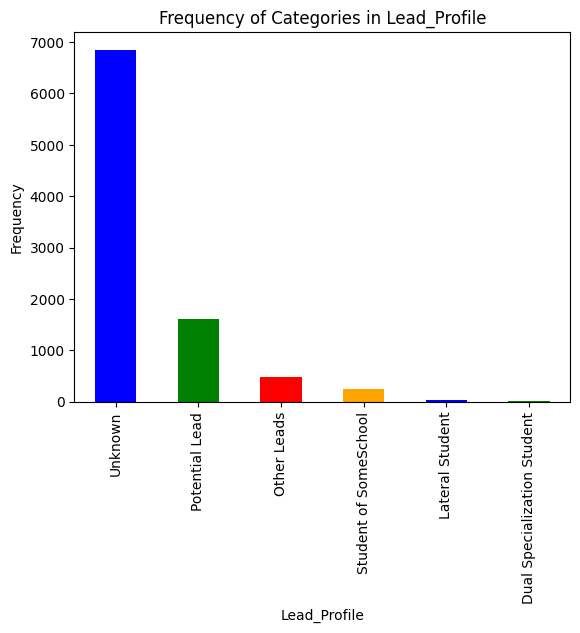

In [158]:
#Bar chart

import matplotlib.pyplot as plt
# Bar chart for Lead_Profile

# Count the occurrences of each category
category_counts = df['Lead_Profile'].value_counts()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])

# Add titles and labels
plt.xlabel('Lead_Profile')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in Lead_Profile')

# Display the chart
plt.show()


In [159]:
fig = px.histogram(df, x="Lead_Profile", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# City

In [160]:
df.City.isna().sum()

1420

In [161]:
# Impute null values as 'Unknown'

df['City'] = df['City'].fillna('Unknown')


In [162]:
df.City.value_counts()

City
Mumbai                         3222
Select                         2249
Unknown                        1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [163]:
# Replace Select as Unknown

df['City'] = df['City'].replace('Select', 'Unknown')
df.City.value_counts()

City
Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

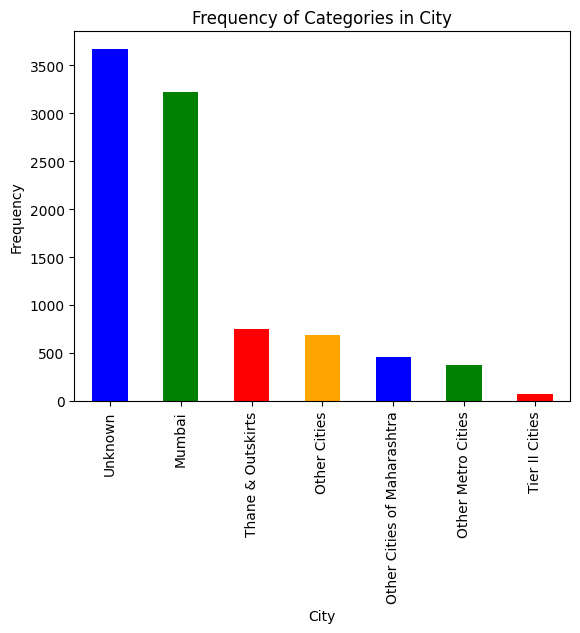

In [164]:
# Bar chart

import matplotlib.pyplot as plt
# Bar chart for City

# Count the occurrences of each category
category_counts = df['City'].value_counts()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])

# Add titles and labels
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in City')

# Display the chart
plt.show()


In [165]:
fig = px.histogram(df, x="City", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# 	I agree to pay the amount through cheque

In [166]:
df= df.rename(columns={'I agree to pay the amount through cheque': 'I_agree_to_pay_the_amount_through_cheque'})

In [167]:
df.I_agree_to_pay_the_amount_through_cheque.isna().sum()

0

In [168]:
df.I_agree_to_pay_the_amount_through_cheque.value_counts()

I_agree_to_pay_the_amount_through_cheque
No    9240
Name: count, dtype: int64

In [169]:
fig = px.histogram(df, x="I_agree_to_pay_the_amount_through_cheque", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# A free copy of Mastering The Interview

In [170]:
df= df.rename(columns={'A free copy of Mastering The Interview': 'A_free_copy_of_Mastering_The_Interview'})

In [171]:
df.A_free_copy_of_Mastering_The_Interview.isna().sum()

0

In [172]:
df.A_free_copy_of_Mastering_The_Interview.value_counts()

A_free_copy_of_Mastering_The_Interview
No     6352
Yes    2888
Name: count, dtype: int64

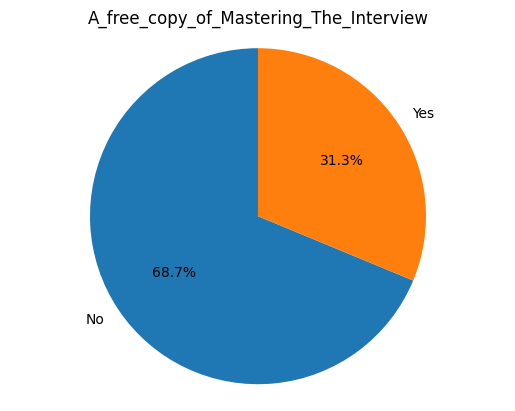

In [173]:
# Pie chart
# Count the occurrences of each category
category_counts = df['A_free_copy_of_Mastering_The_Interview'].value_counts()

# Create the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('A_free_copy_of_Mastering_The_Interview')

# Ensure the circle's proportion
plt.axis('equal')

# Display the chart
plt.show()


In [174]:
fig = px.histogram(df, x="A_free_copy_of_Mastering_The_Interview", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

# Last Notable Activity

In [175]:
df= df.rename(columns={'Last Notable Activity': 'Last_Notable_Activity'})

In [176]:
df.Last_Notable_Activity.isna().sum()

0

In [177]:
df.Last_Notable_Activity.value_counts()

Last_Notable_Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [178]:
#group occurrences lesser than 10

def group_low_frequency_categories(df, column_name, threshold=10):
  value_counts = df[column_name].value_counts()
  low_frequency_categories = value_counts[value_counts < threshold].index.tolist()
  df[column_name] = df[column_name].apply(lambda x: 'Other' if x in low_frequency_categories else x)
  return df

# Example usage:
df = group_low_frequency_categories(df, 'Last_Notable_Activity')

df.Last_Notable_Activity.value_counts()


Last_Notable_Activity
Modified                    3407
Email Opened                2827
SMS Sent                    2172
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  47
Unreachable                   32
Had a Phone Conversation      14
Other                          7
Name: count, dtype: int64

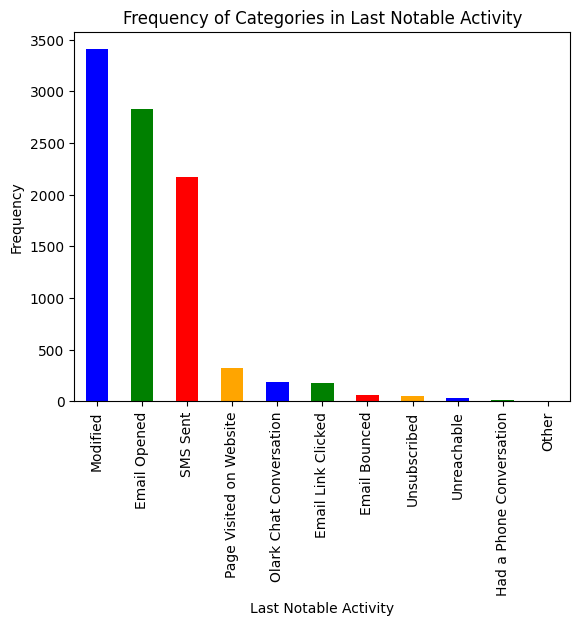

In [179]:
#Bar chart

import matplotlib.pyplot as plt
# Bar chart for Last_Notable_Activity

# Count the occurrences of each category
category_counts = df['Last_Notable_Activity'].value_counts()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])

# Add titles and labels
plt.xlabel('Last Notable Activity')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in Last Notable Activity')

# Display the chart
plt.show()


In [180]:
fig = px.histogram(df, x="Last_Notable_Activity", color ="Converted", pattern_shape="Converted")


fig.update_layout(bargap=0.2)

fig.show()

In [182]:
# prompt: download the df dataset

from google.colab import files

df.to_csv('df_dataset.csv', encoding = 'utf-8-sig')
files.download('df_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Encoding with ONE HOT ENCODER

In [ ]:
#Now doing one hot encoding
df_new=pd.get_dummies(df, columns=['Lead_Origin', 'Lead_Source', 'Do_Not_Email', 'Do_Not_Call', 'Last_Activity', 'Country', 'Specialization', 'How_did_you_hear_about_X_Education', 'What_is_your_current_occupation', 'What_matters_most_to_you_in_choosing_a_course', 'Search', 'Magazine', 'Newspaper_Article', 'X_Education_Forums', 'Newspaper', 'Digital_Advertisement', 'Through_Recommendations', 'Receive_More_Updates_About_Our_Courses', 'Tags', 'Update_me_on_Supply_Chain_Content', 'Get_updates_on_DM_Content', 'Lead_Profile', 'City', 'I_agree_to_pay_the_amount_through_cheque', 'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity'],drop_first=False)
print(df_new.shape)

(9240, 147)


# Treating CLASS IMBALANCE

In [ ]:
df_new.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

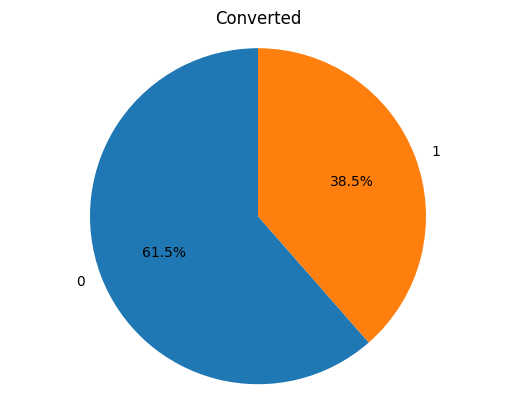

In [ ]:
#Pie Chart
# Count the occurrences of each category
category_counts = df['Converted'].value_counts()

# Create the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Converted')

# Ensure the circle's proportion
plt.axis('equal')

# Display the chart
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
y = df_new['Converted']
X = df_new.drop('Converted', axis=1)

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
balanced_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Converted'])], axis=1)

In [ ]:
balanced_df.shape

(11358, 147)

In [ ]:
balanced_df.Converted.value_counts()

Converted
0    5679
1    5679
Name: count, dtype: int64

# Scaling the Dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(balanced_df.drop('Converted',axis=1))
scaled_features = scaler.transform(balanced_df.drop('Converted',axis=1))

In [ ]:
df_scaled = pd.DataFrame(scaled_features, columns = balanced_df.drop('Converted',axis=1).columns)
df_scaled.head()

TotalVisits  Total_Time_Spent_on_Website  Page_Views_Per_Visit  \
0     0.000000                     0.000000              0.000000   
1     0.454545                     0.296655              0.416667   
2     0.181818                     0.674296              0.333333   
3     0.090909                     0.134243              0.166667   
4     0.181818                     0.628521              0.166667   

   Lead_Origin_API  Lead_Origin_Landing Page Submission  \
0              1.0                                  0.0   
1              1.0                                  0.0   
2              0.0                                  1.0   
3              0.0                                  1.0   
4              0.0                                  1.0   

   Lead_Origin_Lead Add Form  Lead_Origin_Lead Import  \
0                        0.0                      0.0   
1                        0.0                      0.0   
2                        0.0                      0.0   
3                        0.0                      0.0   
4                        0.0                      0.0   

   Lead_Origin_Quick Add Form  Lead_Source_Direct Traffic  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         1.0   
3                         0.0                         1.0   
4                         0.0                         0.0   

   Lead_Source_Facebook  Lead_Source_Google  Lead_Source_Olark Chat  \
0                   0.0                 0.0                     1.0   
1                   0.0                 0.0                     0.0   
2                   0.0                 0.0                     0.0   
3                   0.0                 0.0                     0.0   
4                   0.0                 1.0                     0.0   

   Lead_Source_Organic Search  Lead_Source_Other  Lead_Source_Reference  \
0                         0.0                0.0                    0.0   
1                         1.0                0.0                    0.0   
2                         0.0                0.0                    0.0   
3                         0.0                0.0                    0.0   
4                         0.0                0.0                    0.0   

   Lead_Source_Referral Sites  Lead_Source_Unknown  \
0                         0.0                  0.0   
1                         0.0                  0.0   
2                         0.0                  0.0   
3                         0.0                  0.0   
4                         0.0                  0.0   

   Lead_Source_Welingak Website  Do_Not_Email_No  Do_Not_Email_Yes  \
0                           0.0              1.0               0.0   
1                           0.0              1.0               0.0   
2                           0.0              1.0               0.0   
3                           0.0              1.0               0.0   
4                           0.0              1.0               0.0   

   Do_Not_Call_No  Do_Not_Call_Yes  Last_Activity_Converted to Lead  \
0             1.0              0.0                              0.0   
1             1.0              0.0                              0.0   
2             1.0              0.0                              0.0   
3             1.0              0.0                              0.0   
4             1.0              0.0                              1.0   

   Last_Activity_Email Bounced  Last_Activity_Email Link Clicked  \
0                          0.0                               0.0   
1                          0.0                               0.0   
2                          0.0                               0.0   
3                          0.0                               0.0   
4                          0.0                               0.0   

   Last_Activity_Email Opened  Last_Activity_Form Submitted on 

# X and Y Split

In [ ]:
X = scaled_features                ### independent
y = balanced_df['Converted']           ### target or dependent

# Split into TRAIN and TEST

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 0)

# Visualize the model scores

In [ ]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score #,plot_confusion_matrix
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# List of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Dictionaries to store results
results_train = {}
results_test = {}

# K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, clf in classifiers.items():
    # Cross-validation
    cv_results = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
    results_train[name] = {
        'CrossVal_Score_Mean': cv_results.mean(),
        'CrossVal_Error': cv_results.std()
    }

    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    # Evaluate the predictions
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
    clf_report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store the evaluation metrics
    results_test[name] = {
        'Accuracy': accuracy,
        'F1_Score': f1,
        'ROC_AUC_Score': roc_auc,
        'Classification_Report': clf_report,
        'Confusion_Matrix': cm
    }

# Print the cross-validation results
for name, result in results_train.items():
    print(f"{name} (Training):")
    print(f"  CrossVal_Score_Mean: {result['CrossVal_Score_Mean']:.4f}")
    print(f"  CrossVal_Error: {result['CrossVal_Error']:.4f}")
    print()

# Print the test results
for name, result in results_test.items():
    print(f"{name} (Test):")
    print(f"  Accuracy: {result['Accuracy']:.4f}")
    print(f"  F1_Score: {result['F1_Score']:.4f}")
    print(f"  ROC_AUC_Score: {result['ROC_AUC_Score']}")
    print(f"  Classification_Report:\n{result['Classification_Report']}")
    print(f"  Confusion_Matrix:\n{result['Confusion_Matrix']}\n")


Logistic Regression (Training):
  CrossVal_Score_Mean: 0.9465
  CrossVal_Error: 0.0048

Random Forest (Training):
  CrossVal_Score_Mean: 0.9474
  CrossVal_Error: 0.0057

AdaBoost (Training):
  CrossVal_Score_Mean: 0.9458
  CrossVal_Error: 0.0049

Bagging (Training):
  CrossVal_Score_Mean: 0.9420
  CrossVal_Error: 0.0045

Extra Trees (Training):
  CrossVal_Score_Mean: 0.9436
  CrossVal_Error: 0.0046

Gradient Boosting (Training):
  CrossVal_Score_Mean: 0.9501
  CrossVal_Error: 0.0057

XGBoost (Training):
  CrossVal_Score_Mean: 0.9454
  CrossVal_Error: 0.0035

Decision Tree (Training):
  CrossVal_Score_Mean: 0.9304
  CrossVal_Error: 0.0064

SVM (Training):
  CrossVal_Score_Mean: 0.9434
  CrossVal_Error: 0.0033

KNN (Training):
  CrossVal_Score_Mean: 0.9127
  CrossVal_Error: 0.0069

Naive Bayes (Training):
  CrossVal_Score_Mean: 0.8872
  CrossVal_Error: 0.0051

Logistic Regression (Test):
  Accuracy: 0.9539
  F1_Score: 0.9543
  ROC_AUC_Score: 0.9858136055588798
  Classification_Report:
  

In [ ]:
classifiers

{'Logistic Regression': LogisticRegression(),
 'Random Forest': RandomForestClassifier(),
 'AdaBoost': AdaBoostClassifier(),
 'Bagging': BaggingClassifier(),
 'Extra Trees': ExtraTreesClassifier(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_

# Hyper Parameter Tuning

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
# Print the evaluation metrics# Train the Random Forest model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = best_rf.predict(X_train)
y_train_pred_proba = best_rf.predict_proba(X_train)[:, 1]

# Make predictions on the test set
y_test_pred = best_rf.predict(X_test)
y_test_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_clf_report = classification_report(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
test_clf_report = classification_report(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
print("Training Metrics:")
print(f"  Accuracy: {train_accuracy:.4f}")
print(f"  F1_Score: {train_f1:.4f}")
print(f"  ROC_AUC_Score: {train_roc_auc:.4f}")
print(f"  Classification_Report:\n{train_clf_report}")
print(f"  Confusion_Matrix:\n{train_cm}\n")

print("Test Metrics:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  F1_Score: {test_f1:.4f}")
print(f"  ROC_AUC_Score: {test_roc_auc:.4f}")
print(f"  Classification_Report:\n{test_clf_report}")
print(f"  Confusion_Matrix:\n{test_cm}\n")

Training Metrics:
  Accuracy: 0.9755
  F1_Score: 0.9752
  ROC_AUC_Score: 0.9962
  Classification_Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4002
           1       0.98      0.97      0.98      3948

    accuracy                           0.98      7950
   macro avg       0.98      0.98      0.98      7950
weighted avg       0.98      0.98      0.98      7950

  Confusion_Matrix:
[[3928   74]
 [ 121 3827]]

Test Metrics:
  Accuracy: 0.9554
  F1_Score: 0.9558
  ROC_AUC_Score: 0.9857
  Classification_Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1677
           1       0.96      0.95      0.96      1731

    accuracy                           0.96      3408
   macro avg       0.96      0.96      0.96      3408
weighted avg       0.96      0.96      0.96      3408

  Confusion_Matrix:
[[1614   63]
 [  89 1642]]



In [ ]:
# Convert X_train to a Pandas DataFrame (if it's not already)
X_train = pd.DataFrame(X_train,columns = balanced_df.drop('Converted',axis=1).columns)

# Now you can access the columns
feature = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature)

Tags_Will revert after reading the email                                   1.894872e-01
Total_Time_Spent_on_Website                                                1.114978e-01
Tags_Ringing                                                               6.784706e-02
Last_Notable_Activity_SMS Sent                                             6.435290e-02
Lead_Profile_Potential Lead                                                4.005123e-02
Last_Activity_SMS Sent                                                     3.934054e-02
What_is_your_current_occupation_Working Professional                       3.400281e-02
Tags_Closed by Horizzon                                                    3.078962e-02
What_matters_most_to_you_in_choosing_a_course_Better Career Prospects      2.918328e-02
Lead_Origin_Lead Add Form                                                  2.858429e-02
Tags_Lost to EINS                                                          2.738866e-02
What_matters_most_to_you_in_choo

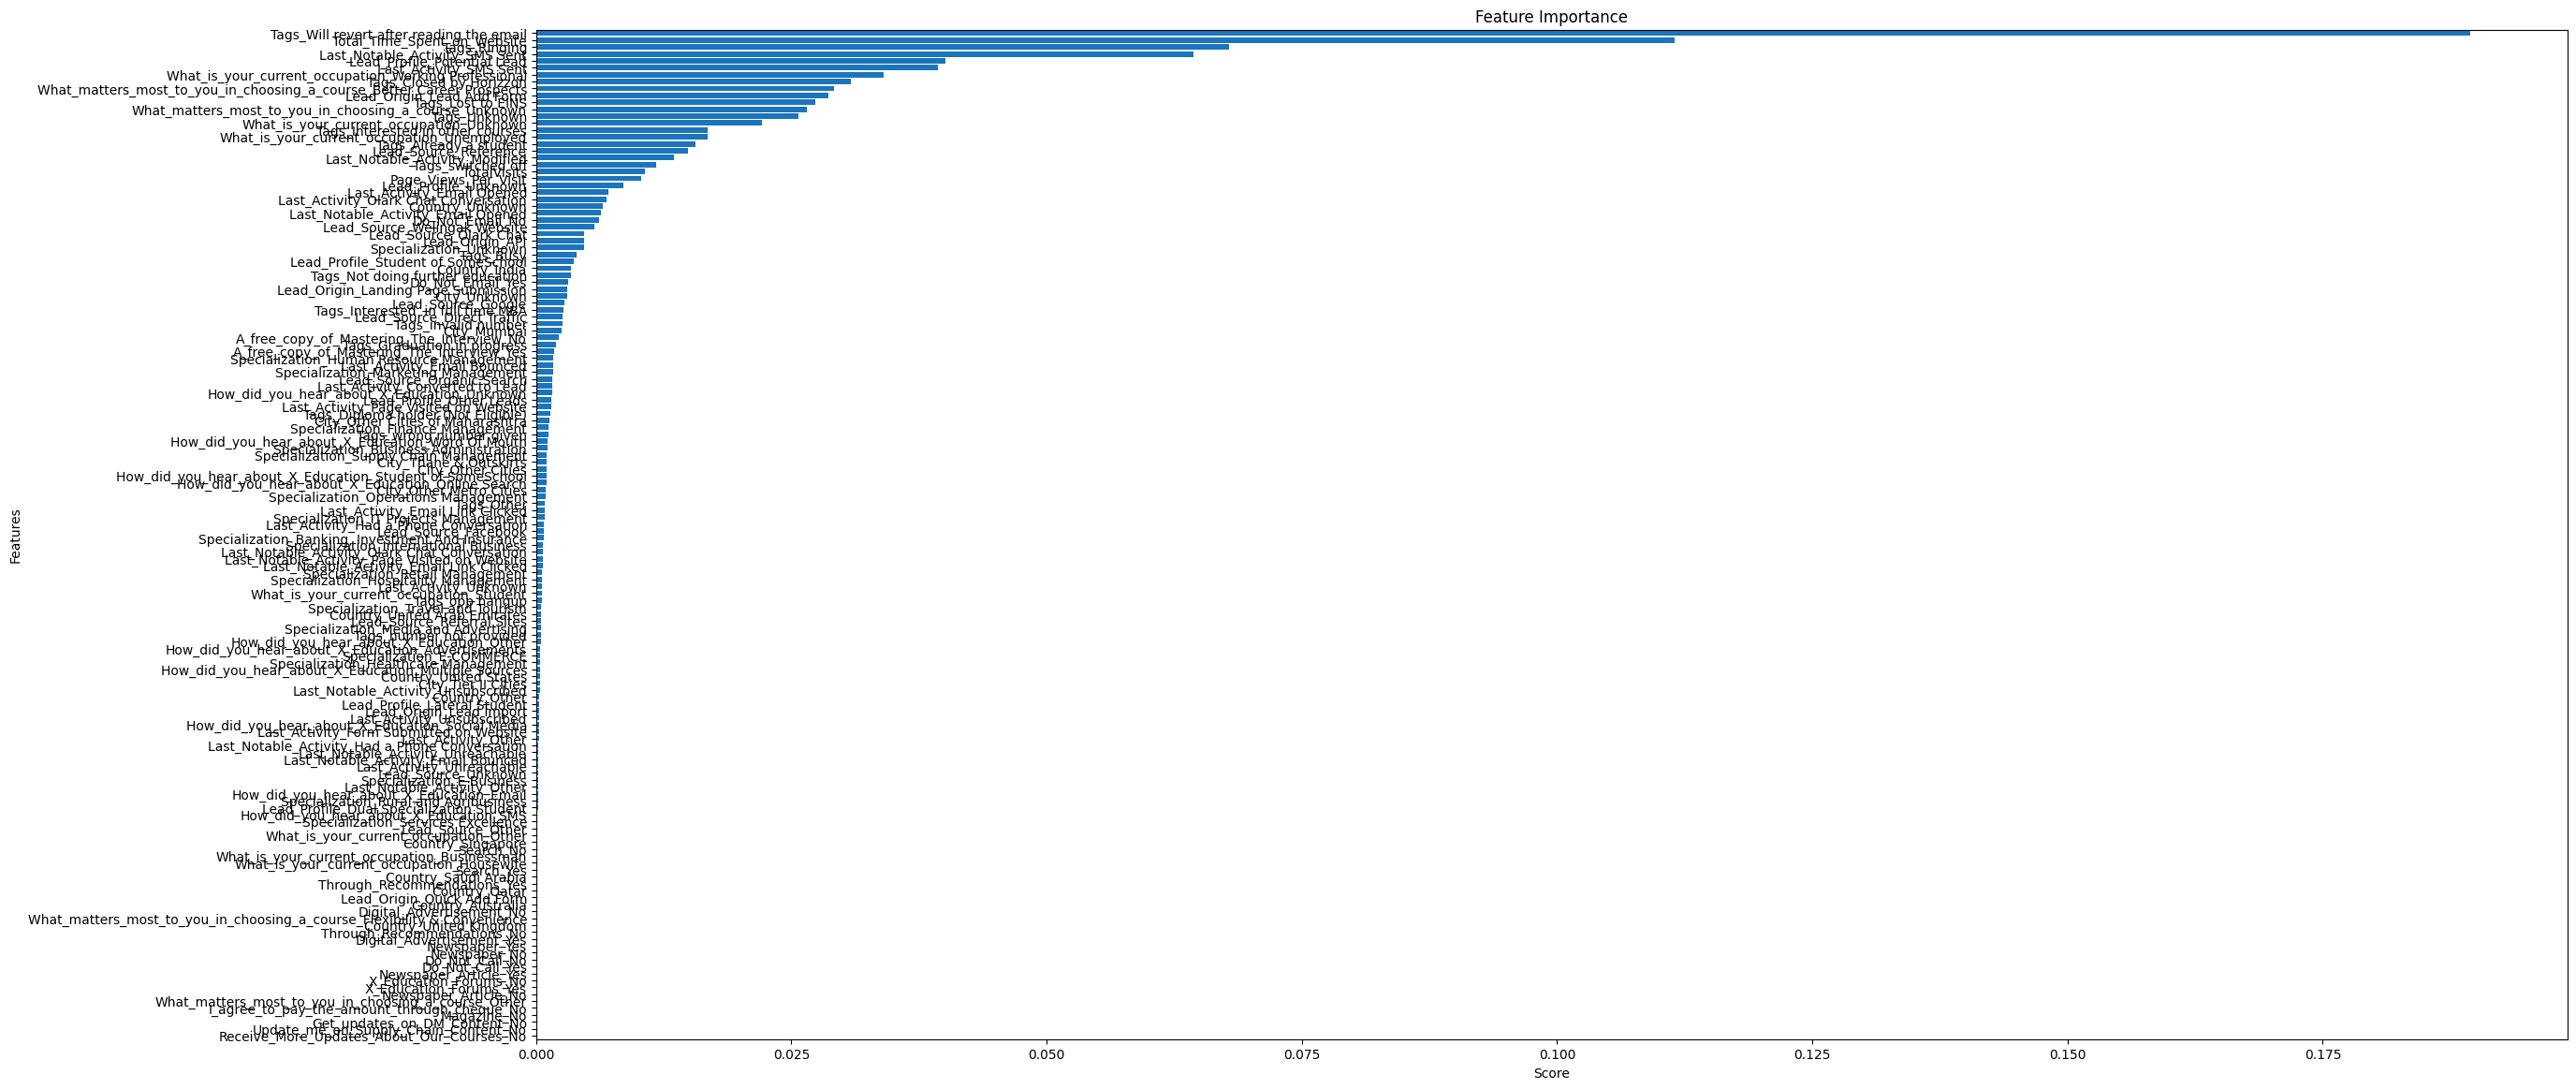

In [ ]:
plt.figure(figsize = (28,14))
sns.barplot(x = feature, y = feature.index,color = '#0078d7')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()